In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train_data.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64381 entries, 0 to 64380
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Timestamp                              64381 non-null  object 
 1   PT N2 'C' Speed                        64381 non-null  float64
 2   Gear High Speed Drive End X Vibr       64381 non-null  float64
 3   Gear High Speed Drive End Y Vibr       64381 non-null  float64
 4   Gear High Speed Non-Drive End X Vibr   64381 non-null  float64
 5   Gear High Speed Non-Drive End Y Vibr   64381 non-null  float64
 6   Gear LS Shaft Axial Displ 1            64381 non-null  float64
 7   Gear LS Shaft Axial Displ 2            64381 non-null  float64
 8   Gear Low Speed Drive End X Vibr        64381 non-null  float64
 9   Gear Low Speed DriveEnd Y Vibr         64381 non-null  float64
 10  Gear Low Speed Non-Drive End X Vibr    64381 non-null  float64
 11  Ge

In [3]:
# train_data.plot(subplots=True, figsize=(20,60))

In [4]:
list_sensor = ['PT N2 \'C\' Speed','Gear High Speed Drive End X Vibr','Gear Low Speed DriveEnd Y Vibr','Gear LS Drive End Jrnl Brg Temp',
               'PT Disc End X Vibr', 'Gear Drain Temp', 'Gear LS Outboard Thrust Brg Temp', 'Gear Low Speed Non-Drive End X Vibr',
               'PT Coupling End Y Vibr', 'Gear High Speed Non-Drive End X Vibr','PT Coupling End X Vibr', 'Pt Coupling End Temp']
# train_data[list_sensor]

In [6]:
import gc
# Normalize data
from sklearn.preprocessing import StandardScaler

list_sensor = ['PT N2 \'C\' Speed','Gear High Speed Drive End X Vibr','Gear Low Speed DriveEnd Y Vibr','Gear LS Drive End Jrnl Brg Temp',
               'PT Disc End X Vibr', 'Gear Drain Temp', 'Gear LS Outboard Thrust Brg Temp', 'Gear Low Speed Non-Drive End X Vibr',
               'PT Coupling End Y Vibr', 'Gear High Speed Non-Drive End X Vibr','PT Coupling End X Vibr', 'Pt Coupling End Temp']

features = train_data[list_sensor].columns.to_list()
# Define scaler dictionary
features_scaler = {}

for col in features:
    # define StandardScaler
    scaler = StandardScaler()
    # fit and transform data with scaler for all features selected
    data_scale = scaler.fit_transform(train_data[col].values.reshape(-1,1))
    data_scale = np.reshape(data_scale, len(data_scale))
    features_scaler['scaler_'+ col] = scaler
    train_data[col] = data_scale

# delete unused variable and flush memory
del data_scale
del col
gc.collect()

481

In [6]:
train_data_selected = train_data[list_sensor]

In [7]:
from sklearn.neural_network import MLPRegressor

n_encoder1 = 25
n_latent = 8
n_decoder1 = 25

autoencoder = MLPRegressor(hidden_layer_sizes=(n_encoder1,  n_latent,  n_decoder1),
                           activation = 'tanh', 
                            solver = 'adam', 
                            learning_rate_init = 0.001, 
                            max_iter = 200, 
                           verbose = True)

autoencoder.fit(train_data_selected.values, train_data_selected.values)

Iteration 1, loss = 0.02037806
Iteration 2, loss = 0.00203471
Iteration 3, loss = 0.00147456
Iteration 4, loss = 0.00105849
Iteration 5, loss = 0.00071539
Iteration 6, loss = 0.00052114
Iteration 7, loss = 0.00040765
Iteration 8, loss = 0.00033543
Iteration 9, loss = 0.00028092
Iteration 10, loss = 0.00023421
Iteration 11, loss = 0.00019861
Iteration 12, loss = 0.00017868
Iteration 13, loss = 0.00016676
Iteration 14, loss = 0.00015953
Iteration 15, loss = 0.00015423
Iteration 16, loss = 0.00015034
Iteration 17, loss = 0.00014778
Iteration 18, loss = 0.00014558
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(activation='tanh', hidden_layer_sizes=(25, 8, 25), verbose=True)

In [8]:
# Helper function for selecting data easier
def data_selector(data, features, time_range_low=None, time_range_high=None):
    if time_range_low != None and time_range_high != None:
        data_selected_time = data.loc[(data['Timestamp'] >= time_range_low) & (data['Timestamp'] <= time_range_high)]
    elif time_range_low != None:
        data_selected_time = data.loc[(data['Timestamp'] >= time_range_low)]
    elif time_range_high != None:
        data_selected_time = data.loc[(data['Timestamp'] <= time_range_low)]
    data_selected = data_selected_time[features]
    return data_selected

In [9]:
df = pd.read_csv('BLD-LGC PTGBX 26 JUL21-8FEB23 edited.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')
df.head()

,Timestamp,PT N2 'C' Speed,Gear High Speed Drive End X Vibr,Gear High Speed Drive End Y Vibr,Gear High Speed Non-Drive End X Vibr,Gear High Speed Non-Drive End Y Vibr,Gear LS Shaft Axial Displ 1,Gear LS Shaft Axial Displ 2,Gear Low Speed Drive End X Vibr,Gear Low Speed DriveEnd Y Vibr,...,Gear LS Drive End Jrnl Brg Temp,Gear LS Inboard Thrust Brg Temp,LO Supply Press,LO Cooler Outlet Temp,Pt Thrust Brg Temp,Pt Coupling End Temp,Pt Disch End Temp,PT Rim Cooling 1&2 Temp,PT Rim Cooling 3&4 Temp,Gear LS Non-Drive End Jrnl Brg Temp
0,2021-07-26 05:45:00,5128.723145,0.296389,0.413373,0.324846,0.491988,10.041477,10.557626,0.379022,0.364291,...,196.280426,127.332596,22.722622,106.153740,139.316666,175.296387,188.311005,779.865906,780.616089,194.377380
1,2021-07-26 05:50:00,5130.262207,0.294855,0.405914,0.325042,0.491340,10.247612,10.784430,0.377899,0.370086,...,196.279938,128.343506,22.721077,107.099617,140.253220,175.291733,188.305359,786.046692,786.820435,195.333084
2,2021-07-26 05:55:00,5121.144531,0.301340,0.405914,0.325830,0.488259,10.378461,10.921785,0.378085,0.366067,...,197.281021,128.869064,22.755575,108.105850,141.249649,175.291733,188.305847,788.598450,789.264954,196.334168
3,2021-07-26 06:00:00,5084.938965,0.308058,0.412083,0.325131,0.495821,10.512401,11.064705,0.373516,0.360375,...,197.281509,129.344574,22.786861,109.097611,141.249649,175.296387,186.298523,789.723938,790.908203,196.329010
4,2021-07-26 06:05:00,5090.241699,0.313758,0.430409,0.322932,0.492476,10.477362,11.035732,0.378831,0.362193,...,197.281021,129.344574,22.748289,109.106941,141.249649,175.296387,186.323547,787.269226,788.036560,195.362763


array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>], dtype=object)

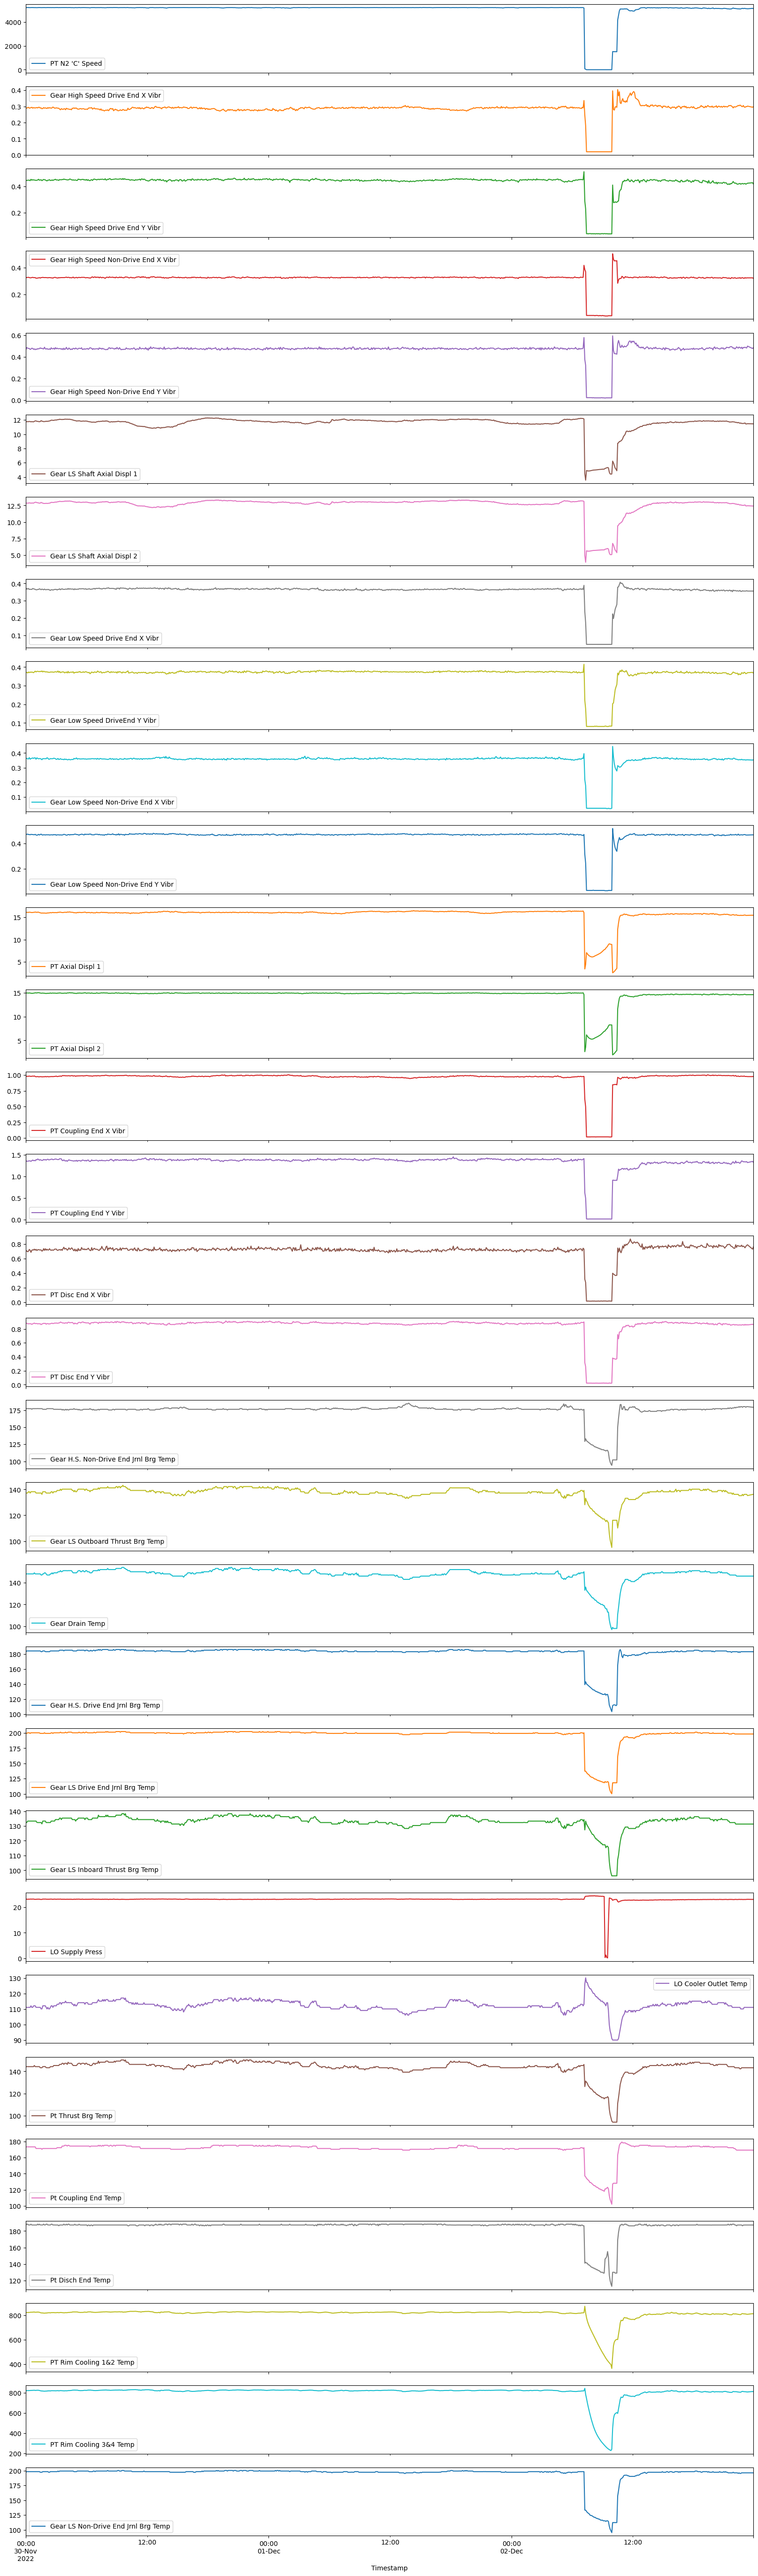

In [10]:
data_test = data_selector(df, df.columns, '2022-11-30 00:00:00','2022-12-02 23:59:59')
data_test.plot(x='Timestamp', subplots=True, figsize=(20,70))

In [11]:
# data_test[list_sensor].plot(x='Timestamp', subplots=True, figsize=(20,70))

KeyError: 'Timestamp'

In [12]:
for col in features:
    # define MinMaxScaler
    scaler = features_scaler['scaler_'+col]
    # fit and transform data with scaler for all features selected
    data_scale = scaler.fit_transform(data_test[col].values.reshape(-1,1))
    data_scale = np.reshape(data_scale, len(data_scale))
    # features_scaler['scaler_'+ col] = scaler
    data_test[col] = data_scale

In [13]:
data_test_t = data_test[list_sensor]

In [14]:
prediction_t = autoencoder.predict(data_test_t.values)


In [15]:
pred = pd.DataFrame(prediction_t)
pred

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.043528,0.592679,0.805255,0.837873,0.604199,0.774812,0.817697,0.612962,0.794740,0.640236,0.949797,0.677664
1,1.043661,0.584947,0.809402,0.835491,0.614013,0.774502,0.816971,0.612187,0.788610,0.637079,0.954242,0.680600
2,1.042375,0.593026,0.799056,0.838725,0.597226,0.774859,0.817656,0.612919,0.790717,0.639617,0.947790,0.681742
3,1.043954,0.593549,0.808089,0.840511,0.604018,0.778061,0.821220,0.611277,0.796492,0.639200,0.949040,0.681800
4,1.045344,0.586528,0.799541,0.843696,0.630895,0.781320,0.827643,0.616520,0.793890,0.637634,0.958211,0.675228
...,...,...,...,...,...,...,...,...,...,...,...,...
859,1.022986,0.612081,0.806444,0.816601,0.673965,0.755695,0.801458,0.609224,0.788046,0.630161,0.943281,0.640327
860,1.025053,0.610309,0.807304,0.818372,0.663961,0.757078,0.802364,0.609350,0.791211,0.630060,0.944092,0.641737
861,1.027091,0.608535,0.808139,0.820126,0.653958,0.758439,0.803252,0.609453,0.794345,0.629919,0.944873,0.643130
862,1.029098,0.606759,0.808949,0.821863,0.643958,0.759780,0.804120,0.609534,0.797447,0.629736,0.945623,0.644507


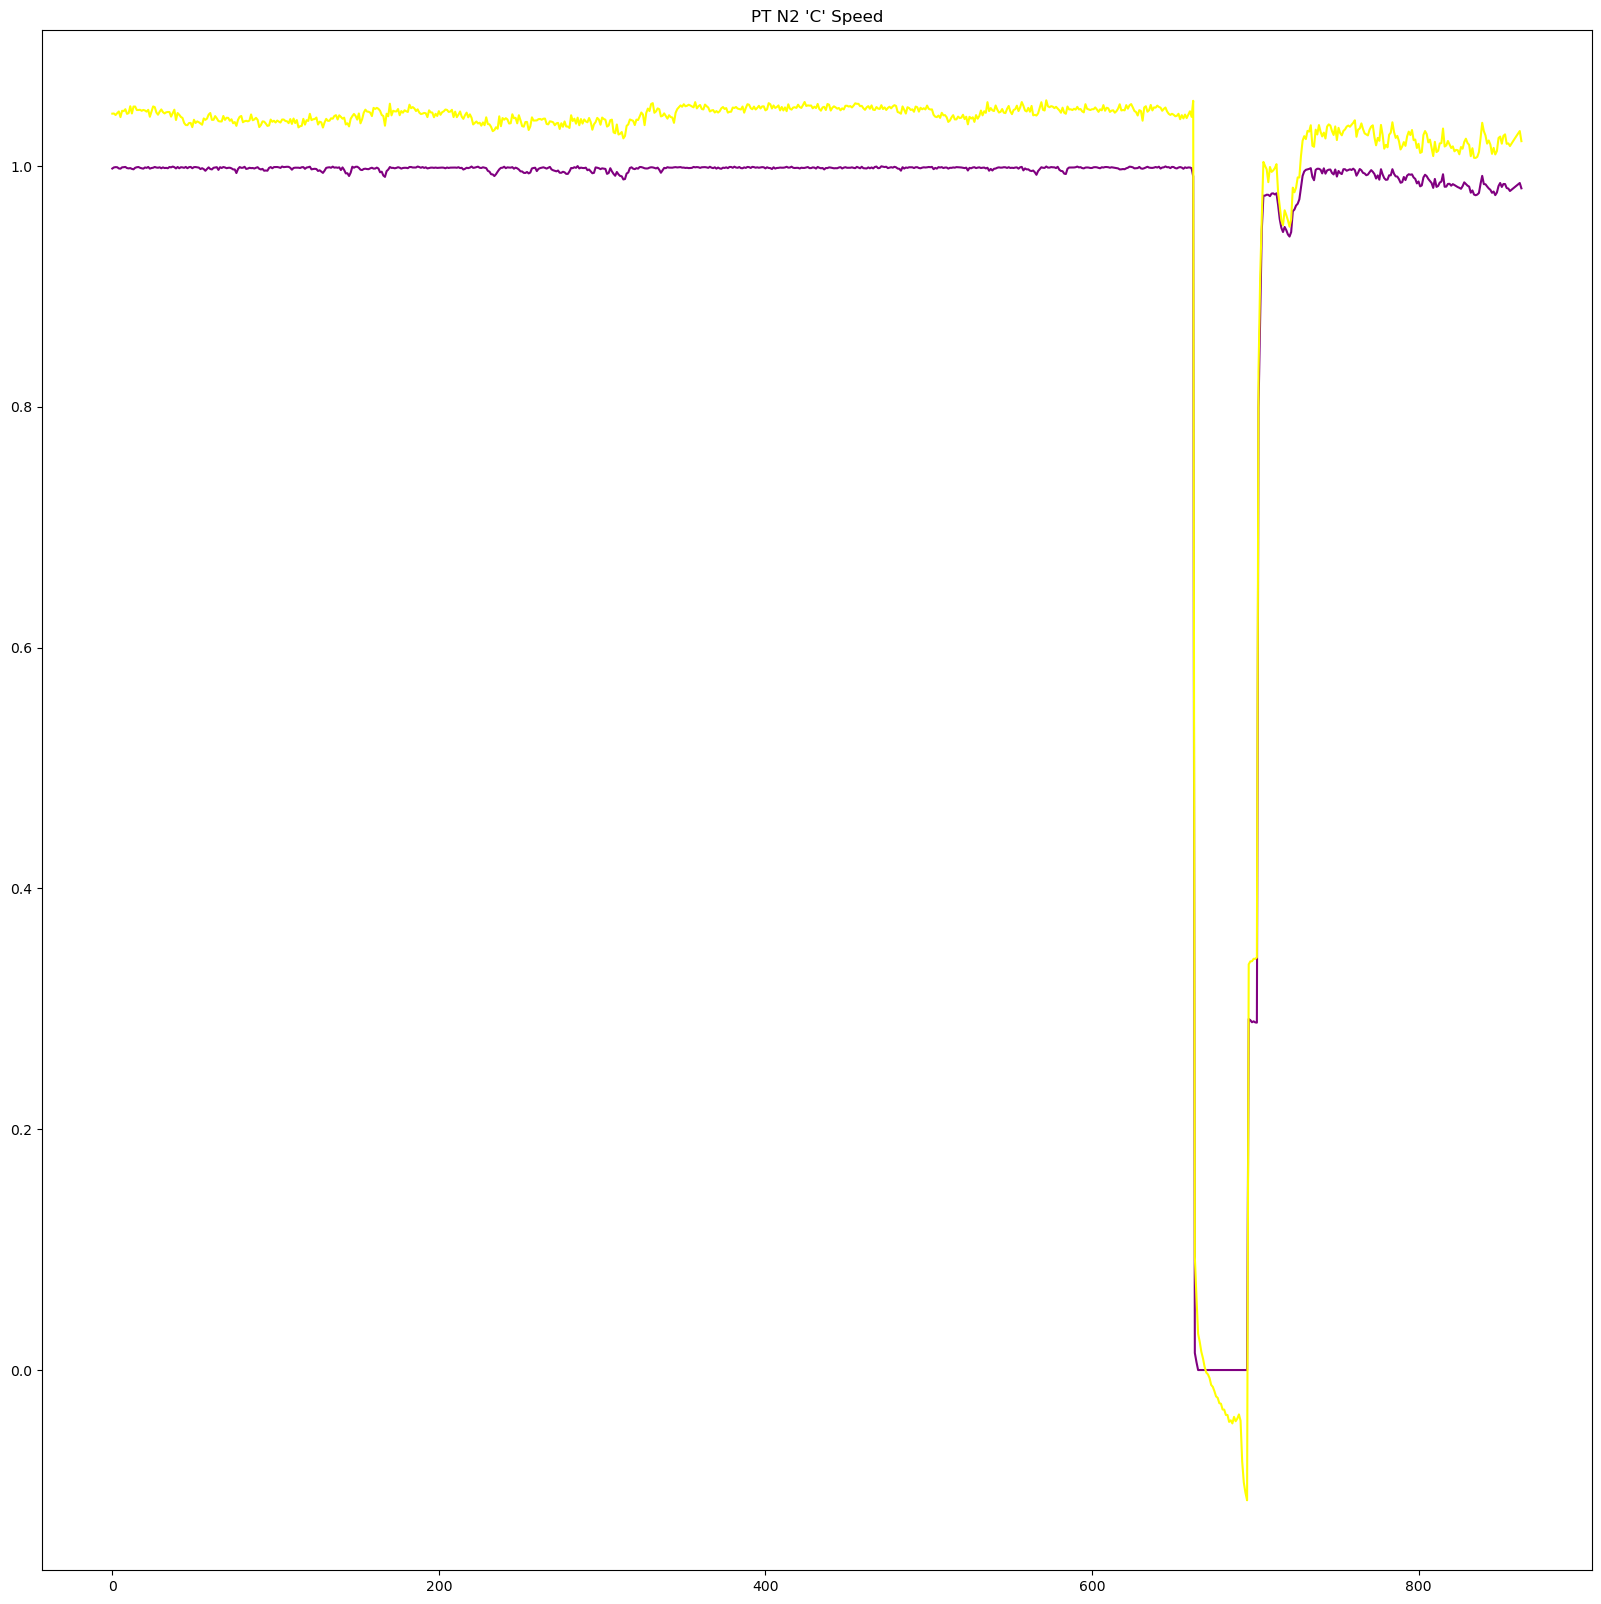

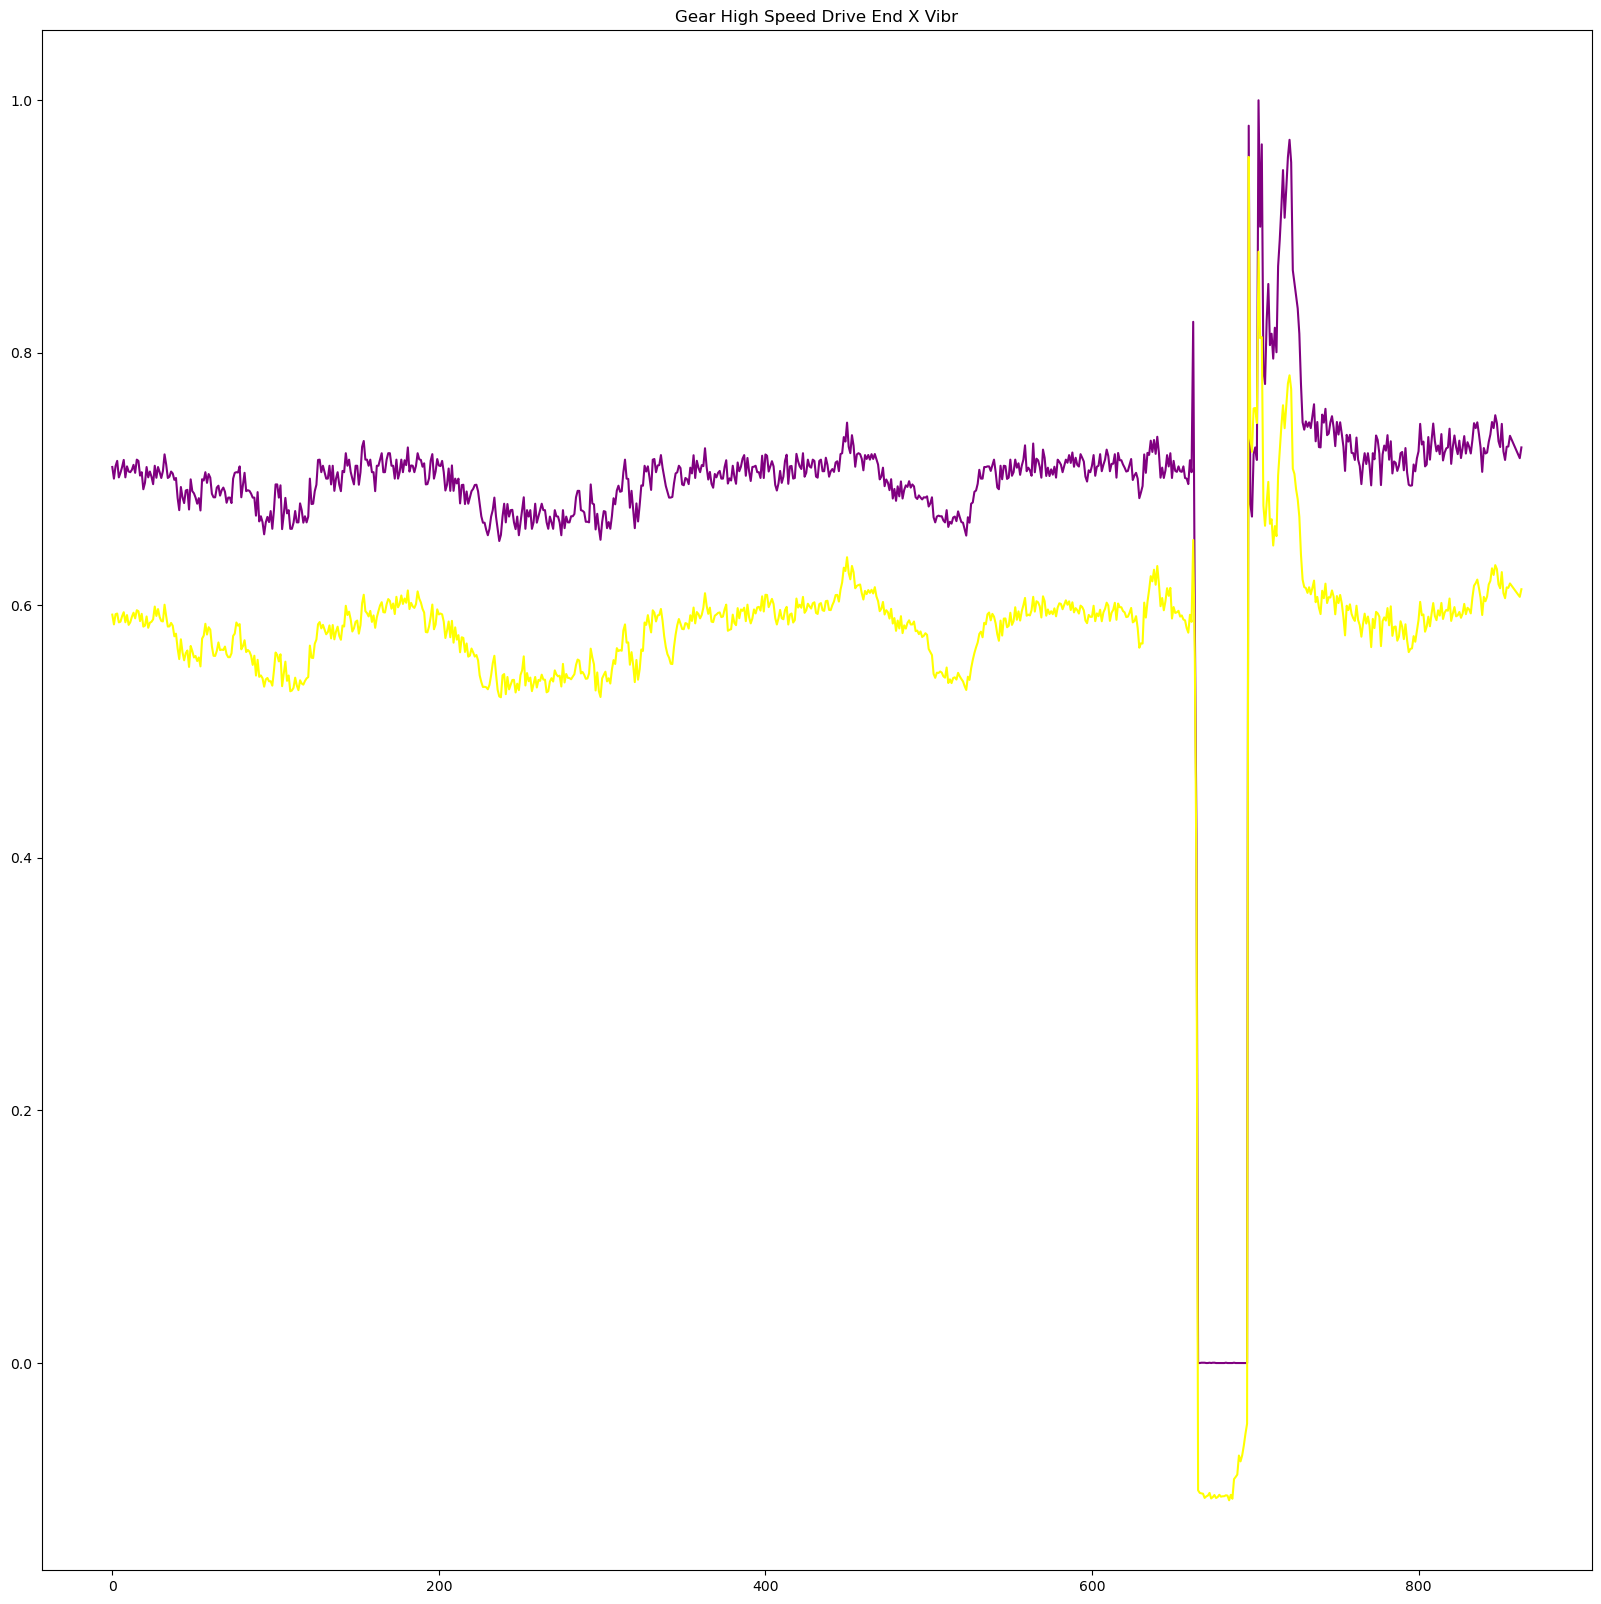

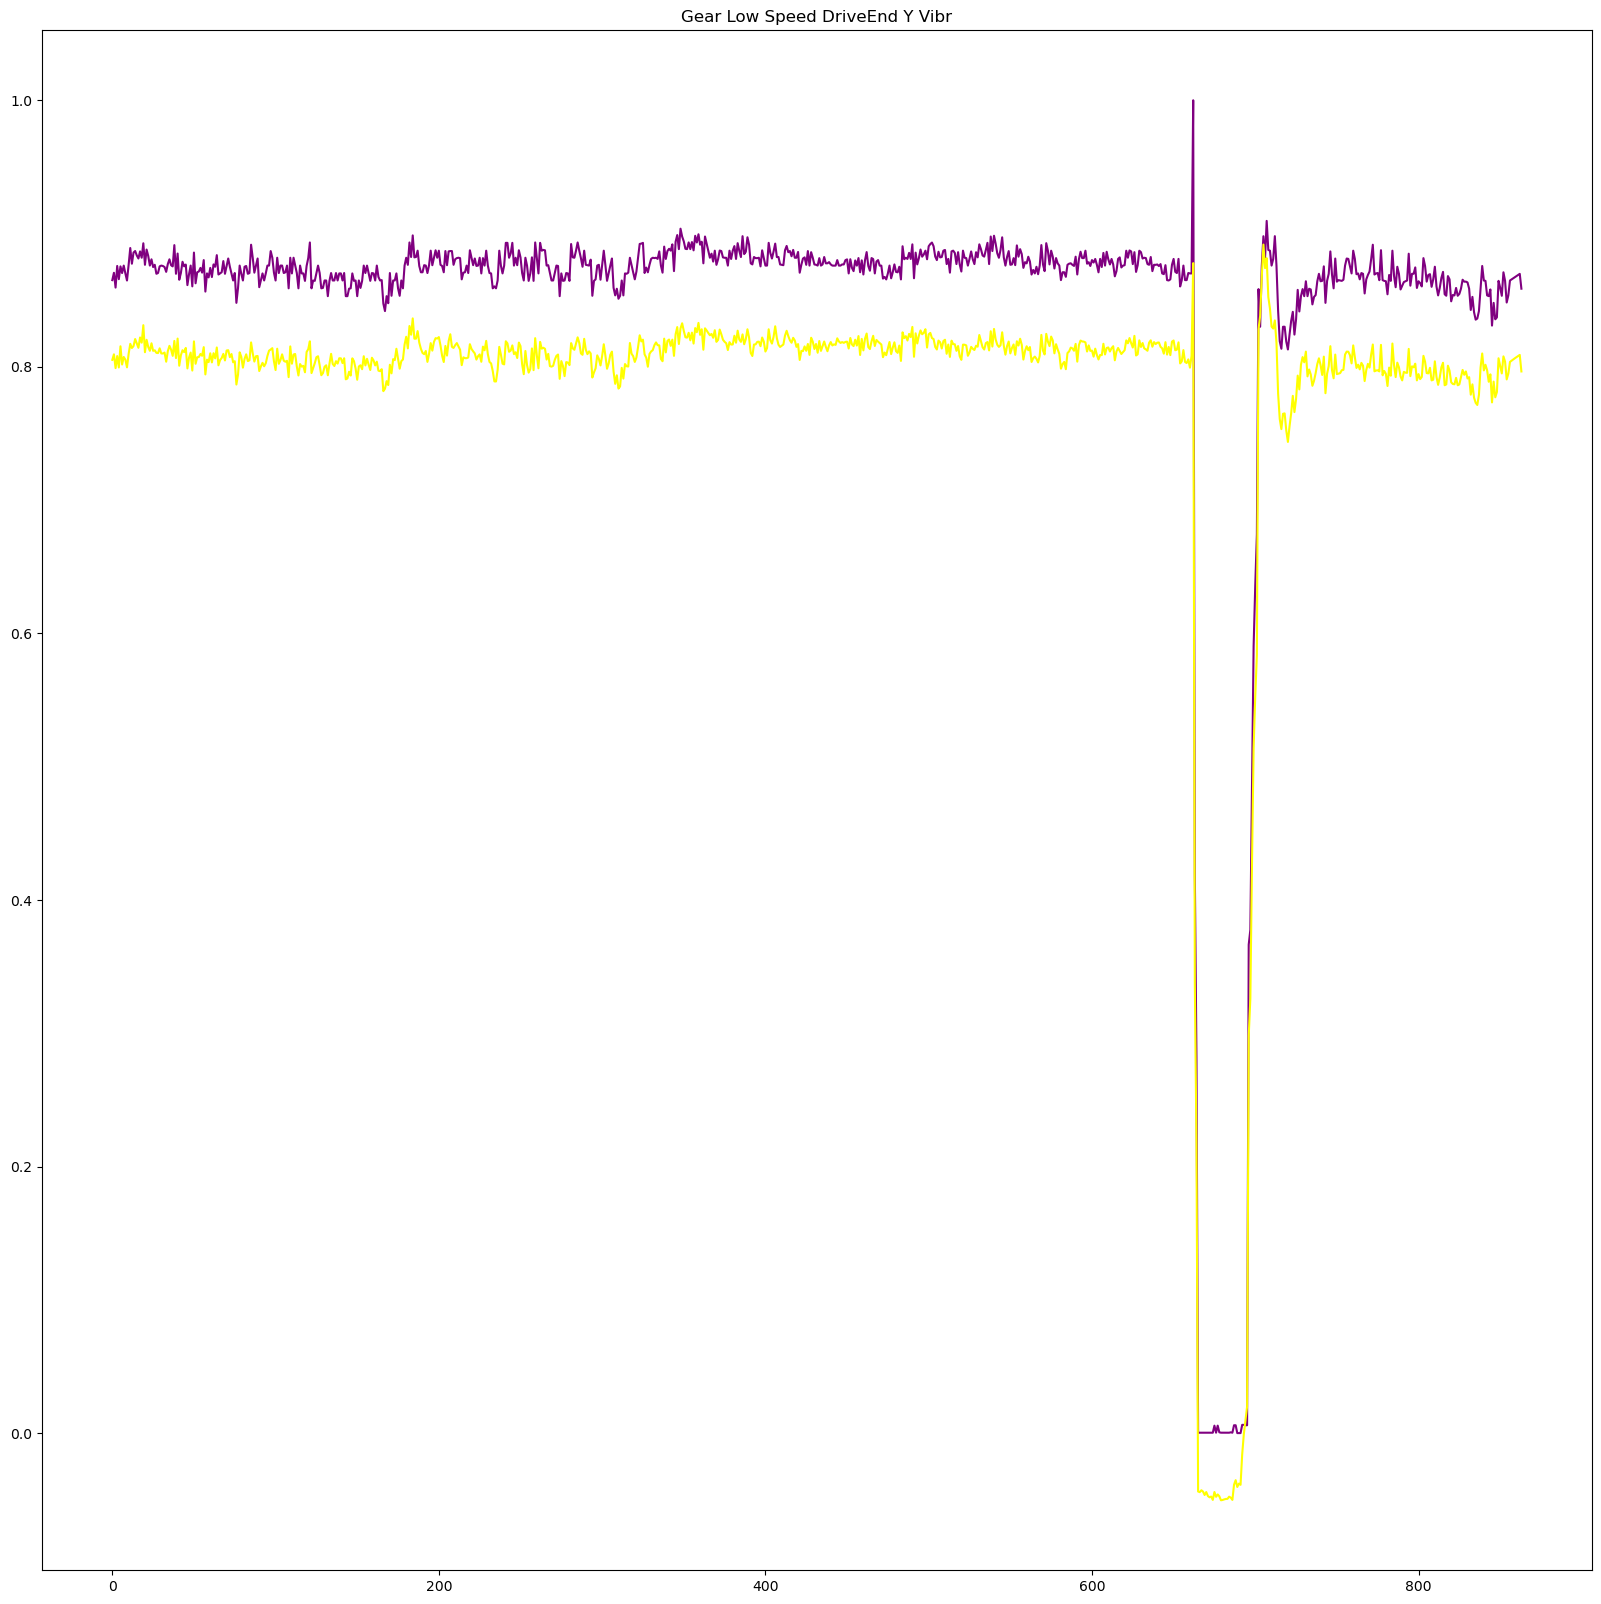

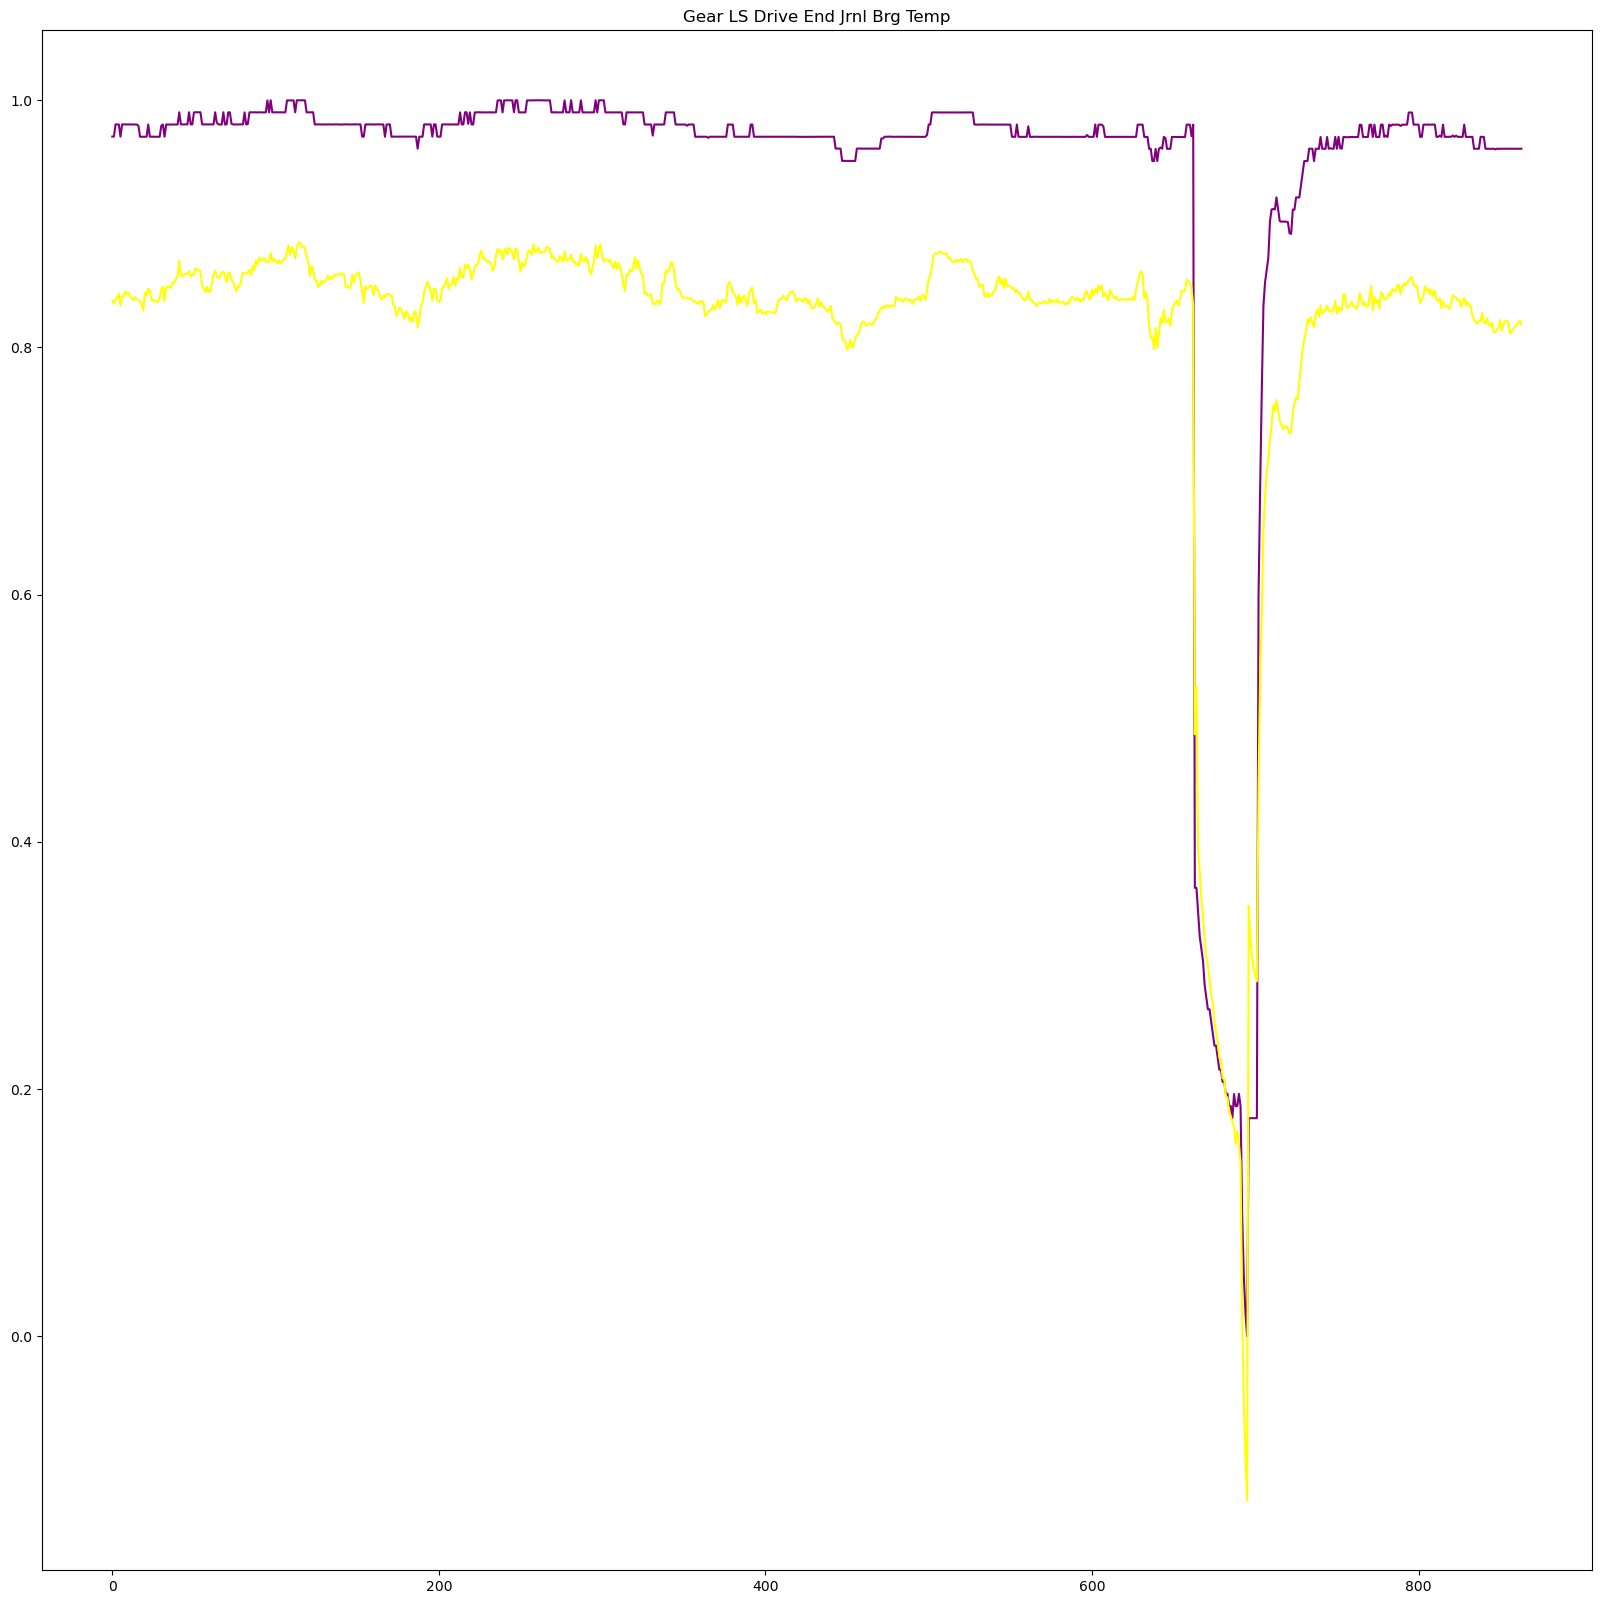

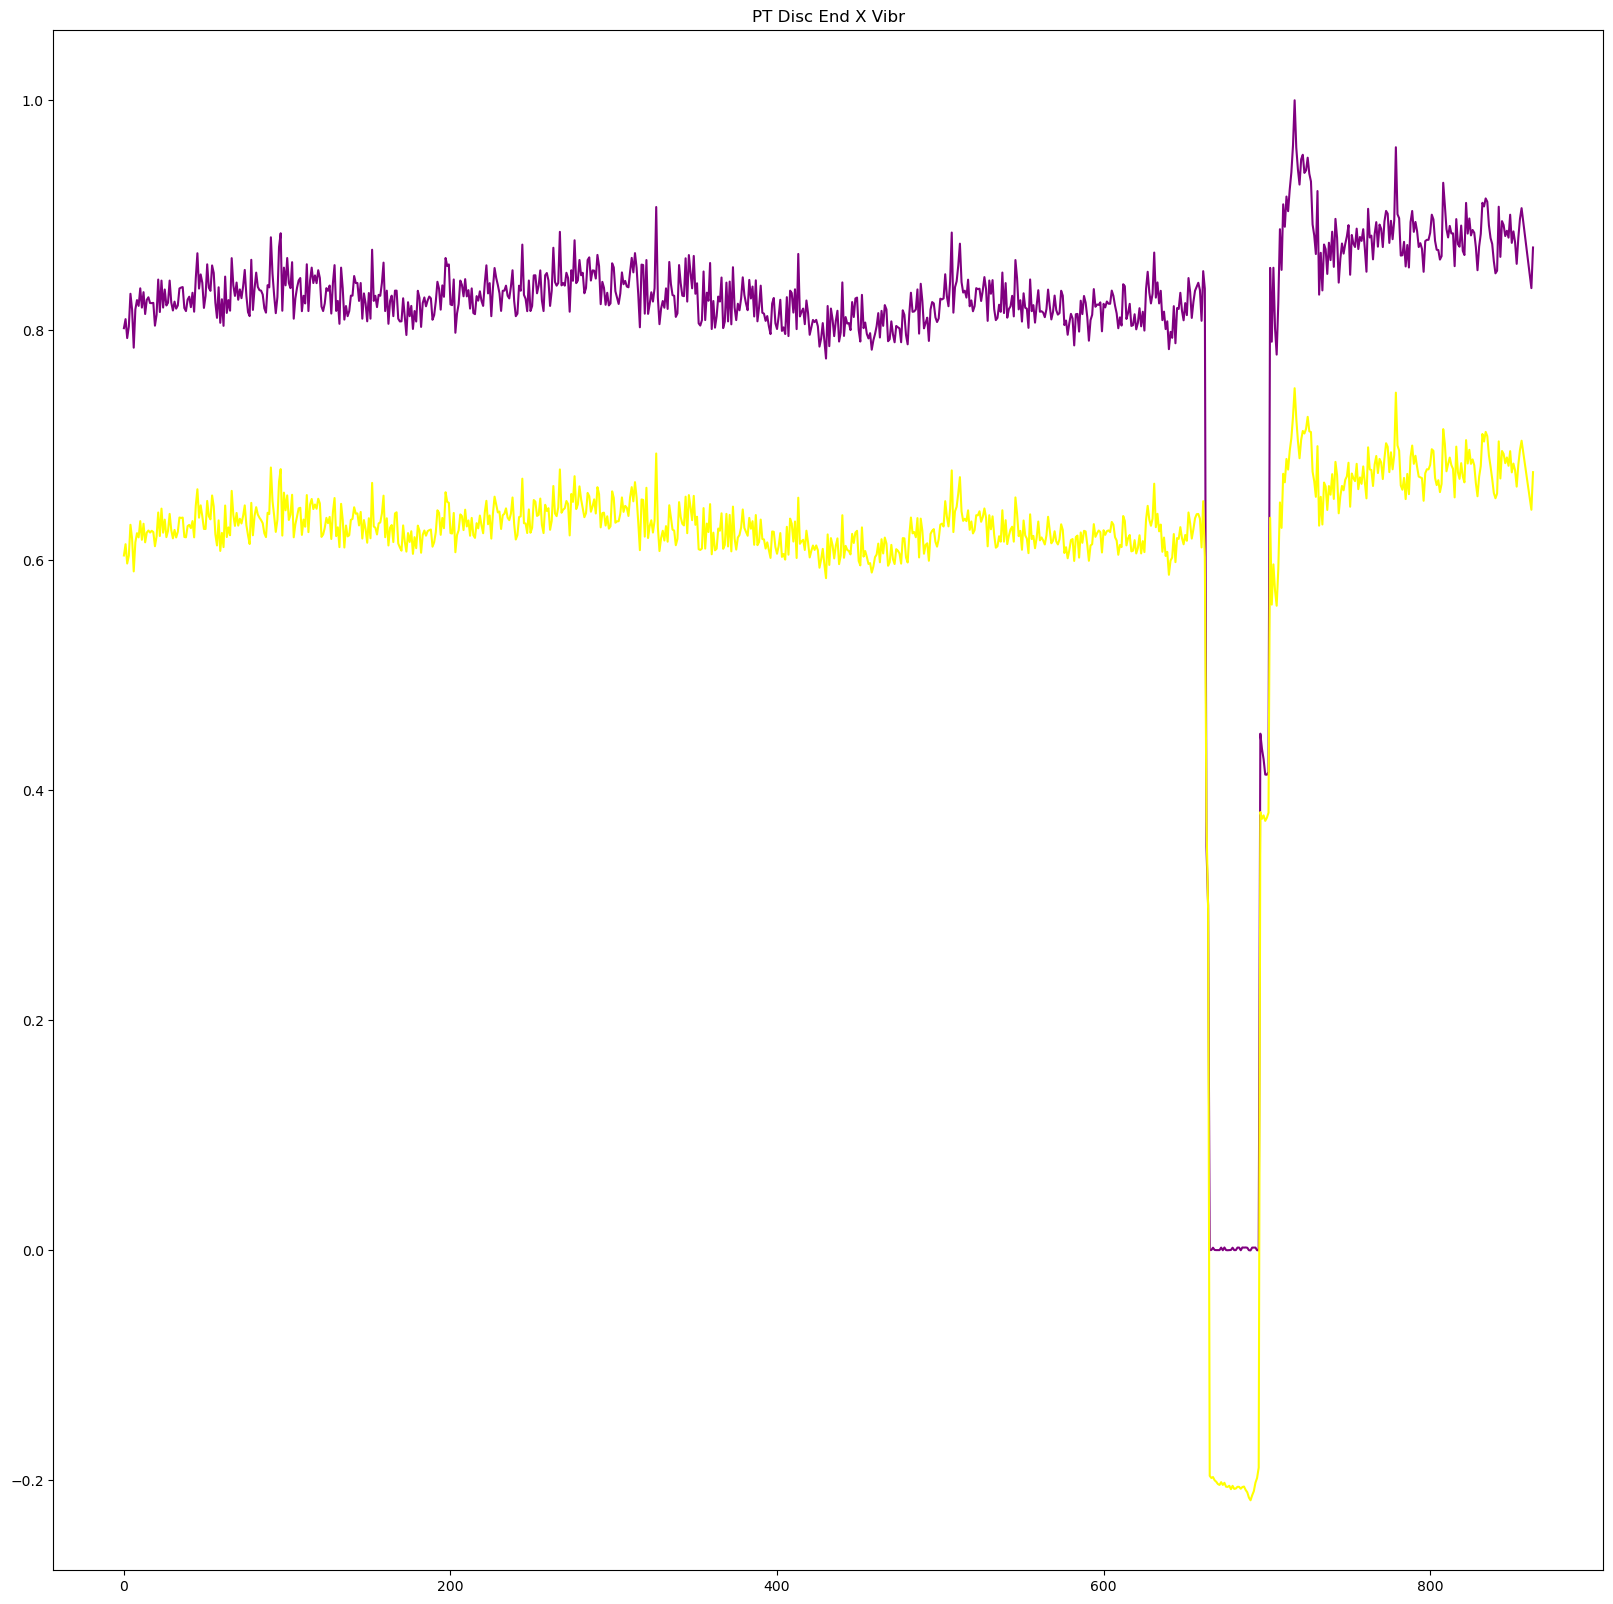

In [16]:
data_test_t.reset_index(inplace=True, drop=True)
# pd.DataFrame(prediction_t[0]).reset_index(0)
# pd.DataFrame(prediction_t[0]).reset_index(0)

plt.figure(figsize=(20,20))
plt.plot(data_test_t['PT N2 \'C\' Speed'], color='purple')
plt.plot(pred[0], color='yellow')
plt.title(list_sensor[0])
plt.show()

plt.figure(figsize=(20,20))
plt.plot(data_test_t['Gear High Speed Drive End X Vibr'], color='purple')
plt.plot(pred[1], color='yellow')
plt.title(list_sensor[1])
plt.show()

plt.figure(figsize=(20,20))
plt.plot(data_test_t['Gear Low Speed DriveEnd Y Vibr'], color='purple')
plt.plot(pred[2], color='yellow')
plt.title(list_sensor[2])
plt.show()

plt.figure(figsize=(20,20))
plt.plot(data_test_t['Gear LS Drive End Jrnl Brg Temp'], color='purple')
plt.plot(pred[3], color='yellow')
plt.title(list_sensor[3])
plt.show()

plt.figure(figsize=(20,20))
plt.plot(data_test_t['PT Disc End X Vibr'], color='purple')
plt.plot(pred[4], color='yellow')
plt.title(list_sensor[4])
plt.show()